In [1]:
import pandas as pd
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf as pdf
import numpy as np
import colors as EL

%matplotlib inline

In [2]:
df = pd.read_csv("./data/experiment_IDs/cleaned_static_data.csv")
print(df.species.unique())

['Aedes aegypti' 'Aedes albopictus' 'Anopheles arabiensis'
 'Anopheles gambiae' 'Culex quinquefasciatus' 'Culex tarsalis']


In [3]:
aegypti = df[df['species'] == 'Aedes aegypti']
albopictus = df[df['species'] == 'Aedes albopictus']
arabiensis = df[df['species'] == 'Anopheles arabiensis']
gambiae = df[df['species'] == 'Anopheles gambiae']
quinque = df[df['species'] == 'Culex quinquefasciatus']
tarsalis = df[df['species'] == 'Culex tarsalis']

print(df['larvae_length_mm'].max(), df['larvae_length_mm'].min())

6.8 3.2


0 mean: 5.3342857142857145
1 mean: 5.026760563380281
2 mean: 4.531182795698924
3 mean: 4.558333333333334
4 mean: 4.954545454545454
5 mean: 4.543396226415094


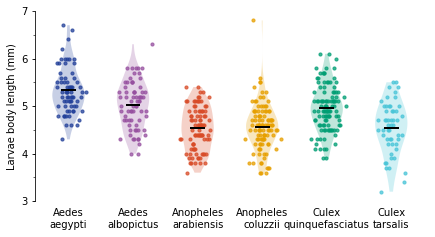

In [4]:
fig = plt.figure(figsize=(14/2, 7/2))
ax1 = fig.add_subplot(111, facecolor="None")

data = [aegypti["larvae_length_mm"].values, 
        albopictus["larvae_length_mm"].values, 
        arabiensis["larvae_length_mm"].values, 
        gambiae["larvae_length_mm"].values,
        quinque["larvae_length_mm"].values,
        tarsalis["larvae_length_mm"].values,
       ]

jitter = [np.random.normal(scale=0.1, size=len(aegypti)), 
          np.random.normal(scale=0.1, size=len(albopictus)),
          np.random.normal(scale=0.1, size=len(arabiensis)), 
          np.random.normal(scale=0.1, size=len(gambiae)),
          np.random.normal(scale=0.1, size=len(quinque)),
          np.random.normal(scale=0.1, size=len(tarsalis))
         ]

parts = ax1.violinplot(data, showmeans=False, showmedians=False, showextrema=False)
colors = [EL.aegypti, EL.albopictus, EL.arabiensis, 
          EL.coluzzii, EL.culex_q, EL.culex_t]

for i, pc in enumerate(parts['bodies']):
    pc.set_facecolor(colors[i])
    pc.set_alpha(0.25)

for i, (j, d) in enumerate(zip(jitter, data)):
    j = [x+i+1 for x in j]
    ax1.scatter(j, d, alpha=0.75, color=colors[i], zorder=5, s=10, marker='o')
    
ax1.set_ylim(3, 7)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['bottom'].set_visible(False)
ax1.set_xticks(np.arange(1, 7, 1))
ax1.set_xticklabels(["Aedes\naegypti", "Aedes\nalbopictus", 
                     "Anopheles\narabiensis", "Anopheles\ncoluzzii", 
                     "Culex\nquinquefasciatus", "Culex\ntarsalis"])
ax1.xaxis.set_ticks_position('none') 
ax1.set_yticks(np.arange(3, 8, 1))
ax1.set_yticks(np.arange(3, 7, 0.5), minor=True)
ax1.set_ylabel("Larvae body length (mm)")

ch = 0.1
for i, datum in enumerate(data):
    ax1.plot([i+1-ch, i+1+ch], [np.mean(datum)]*2, color="k", 
             alpha=1, lw=2, zorder=20)
    print(str(i), 'mean:', np.mean(datum))
    
savename = './figures/S3_sizes.pdf'

# Remove padding and margins from the figure and all its subplots
plt.show()

# Save the Matplotlib figure as a PDF file:
plt.show()
pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()

In [5]:
# READ IN CLEANED DATASET
df = pd.read_csv("./data/experiment_IDs/static_data.csv")
experiments = df["treatment_odor"].unique()
species = ['Aedes aegypti', 'Aedes albopictus', 
           'Anopheles arabiensis', 'Anopheles gambiae', 
           'Culex quinquefasciatus', 'Culex tarsalis']
pers = []

for specie in species: 
    temp = df[df['species'] == specie]
    temp = temp[temp['dead']=='no']
    print('Total number of animals:', len(temp))
    for experiment in experiments:
        temp = df[df["treatment_odor"] == experiment]
        temp = temp[temp['species'] == specie]
        temp2 = temp[temp['dead']=='yes']
        if len(temp) == 0:
            per = 0
        else: 
            per = 100*len(temp2)/len(temp)
        pers.append(per)
        print('Total n=', str(len(temp)), 
              ': Dead n=', str(len(temp2)), 
              ': Percentage =', str(per),
              '% for', experiment, specie)
    print('---')

Total number of animals: 67
Total n= 24 : Dead n= 0 : Percentage = 0.0 % for 100ul_milliQ_water Aedes aegypti
Total n= 26 : Dead n= 1 : Percentage = 3.8461538461538463 % for 100ul_quinine Aedes aegypti
Total n= 22 : Dead n= 1 : Percentage = 4.545454545454546 % for 05_percent_food Aedes aegypti
---
Total number of animals: 70
Total n= 24 : Dead n= 1 : Percentage = 4.166666666666667 % for 100ul_milliQ_water Aedes albopictus
Total n= 30 : Dead n= 4 : Percentage = 13.333333333333334 % for 100ul_quinine Aedes albopictus
Total n= 24 : Dead n= 2 : Percentage = 8.333333333333334 % for 05_percent_food Aedes albopictus
---
Total number of animals: 93
Total n= 42 : Dead n= 13 : Percentage = 30.952380952380953 % for 100ul_milliQ_water Anopheles arabiensis
Total n= 52 : Dead n= 16 : Percentage = 30.76923076923077 % for 100ul_quinine Anopheles arabiensis
Total n= 49 : Dead n= 21 : Percentage = 42.857142857142854 % for 05_percent_food Anopheles arabiensis
---
Total number of animals: 108
Total n= 39 

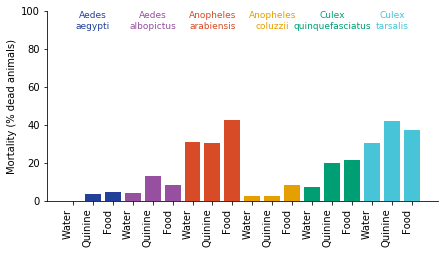

In [6]:
fig = plt.figure(figsize=(14/2, 7/2))
ax1 = fig.add_subplot(111, facecolor="None")
colors = [EL.aegypti]*3 + [EL.albopictus]*3 + [EL.arabiensis]*3 + \
            [EL.coluzzii]*3 + [EL.culex_q]*3 + [EL.culex_t]*3
labs = ['Water', 'Quinine', 'Food']*6

ax1.bar(x=np.arange(0, len(pers)), height=pers, color=colors)
ax1.set_ylim(0, 100)
ax1.set_ylabel('Mortality (% dead animals)')
ax1.set_xticks(np.arange(0, len(pers)))
ax1.set_xticklabels(labs, rotation=90, ha="right")
    
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

colors = [EL.aegypti, EL.albopictus, EL.arabiensis, 
          EL.coluzzii, EL.culex_q, EL.culex_t]
sps = ["Aedes\naegypti", "Aedes\nalbopictus", 
                     "Anopheles\narabiensis", "Anopheles\ncoluzzii", 
                     "Culex\nquinquefasciatus", "Culex\ntarsalis"]
for i, (c, s) in enumerate(zip(colors, sps)):
    ax1.text(i*3+1.5-0.5, 100, s, size=9, color=c, ha='center', va='top')

savename = './figures/S3_mortality.pdf'

# Save the Matplotlib figure as a PDF file:
plt.show()
pp = pdf.PdfPages(savename, keep_empty=False)
pp.savefig(fig)
pp.close()